In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_excel("maliciousornot.xlsx")
df

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [4]:
df.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


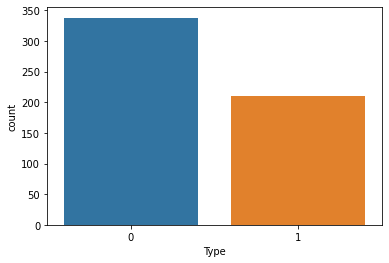

In [6]:
sns.countplot(x="Type", data=df)

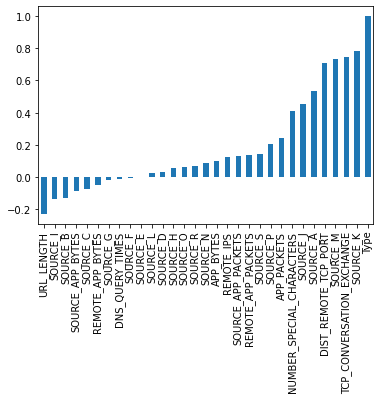

In [7]:
df.corr()["Type"].sort_values().plot(kind="bar") # a way to see correlation

In [11]:
y=df["Type"].values
x=df.drop("Type", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)
len(X_train), len(X_test)

(383, 165)

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # handles fit and transform in one-line
X_test = scaler.transform(X_test)

In [14]:
X_train.shape

(383, 30)

In [16]:
layer_number = X_train.shape[1]
model = Sequential()
model.add(Dense(layer_number, activation="relu")) # good to start with column number of train matrix
model.add(Dense(layer_number/2, activation="relu")) # good to pick a number between column number and 1.
model.add(Dense(layer_number/2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [17]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
12/12 [==============================] - 1s 15ms/step - loss: 0.6861 - val_loss: 0.6756
Epoch 2/400
12/12 [==============================] - 0s 4ms/step - loss: 0.6698 - val_loss: 0.6562
Epoch 3/400
12/12 [==============================] - 0s 4ms/step - loss: 0.6496 - val_loss: 0.6294
Epoch 4/400
12/12 [==============================] - 0s 5ms/step - loss: 0.6234 - val_loss: 0.5989
Epoch 5/400
12/12 [==============================] - 0s 3ms/step - loss: 0.5940 - val_loss: 0.5638
Epoch 6/400
12/12 [==============================] - 0s 3ms/step - loss: 0.5610 - val_loss: 0.5257
Epoch 7/400
12/12 [==============================] - 0s 5ms/step - loss: 0.5235 - val_loss: 0.4831
Epoch 8/400
12/12 [==============================] - 0s 3ms/step - loss: 0.4821 - val_loss: 0.4375
Epoch 9/400
12/12 [==============================] - 0s 3ms/step - loss: 0.4386 - val_loss: 0.3903
Epoch 10/400
12/12 [==============================] - 0s 5ms/step - loss: 0.3950 - val_loss: 0.3454
Epoch 11

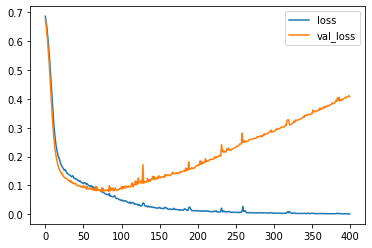

In [18]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [20]:
layer_number = X_train.shape[1]
model = Sequential()
model.add(Dense(layer_number, activation="relu")) # good to start with column number of train matrix
model.add(Dense(layer_number/2, activation="relu")) # good to pick a number between column number and 1.
model.add(Dense(layer_number/2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=25)
model.fit(X_train,y_train, epochs=700, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/700
12/12 [==============================] - 1s 14ms/step - loss: 0.6788 - val_loss: 0.6666
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6632 - val_loss: 0.6487
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6472 - val_loss: 0.6272
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6273 - val_loss: 0.6024
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6043 - val_loss: 0.5744
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5775 - val_loss: 0.5417
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5449 - val_loss: 0.5016
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5046 - val_loss: 0.4525
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4592 - val_loss: 0.3957
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4143 - val_loss: 0.3451
Epoch 11

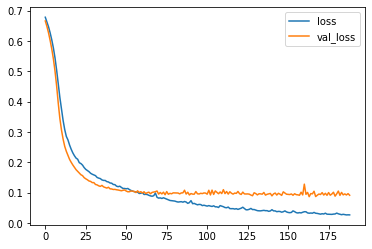

In [21]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [22]:
layer_number = X_train.shape[1]
model = Sequential()
model.add(Dense(layer_number, activation="relu")) # good to start with column number of train matrix
model.add(Dropout(0.3))

model.add(Dense(layer_number/2, activation="relu")) # good to pick a number between column number and 1.
model.add(Dropout(0.3))

model.add(Dense(layer_number/2, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=25)
model.fit(X_train,y_train, epochs=700, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/700
12/12 [==============================] - 1s 27ms/step - loss: 0.6910 - val_loss: 0.6875
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6880 - val_loss: 0.6771
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6776 - val_loss: 0.6662
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6658 - val_loss: 0.6541
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6478 - val_loss: 0.6408
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6484 - val_loss: 0.6258
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6461 - val_loss: 0.6081
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6245 - val_loss: 0.5874
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6043 - val_loss: 0.5618
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5794 - val_loss: 0.5280
Epoch 11

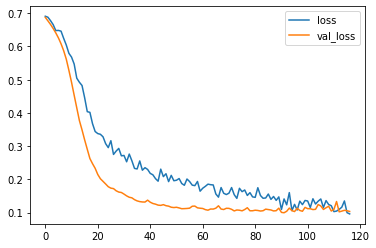

In [25]:
loss = pd.DataFrame(model.history.history)
loss.plot() # It's normal to see spikes when dropout is used.

In [35]:
preds = (model.predict(X_test) > 0.5).astype("int32")
len(preds)

165

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       102
           1       0.94      0.97      0.95        63

    accuracy                           0.96       165
   macro avg       0.96      0.96      0.96       165
weighted avg       0.96      0.96      0.96       165



In [37]:
confusion_matrix(y_test, preds)

array([[98,  4],
       [ 2, 61]])